<a href="https://colab.research.google.com/github/harimaruthachalam/deep-learning-v2-pytorch/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn

In [0]:
# Importing datasets and utils
import torchvision.datasets
import torchvision.transforms as transforms
import torch.nn.functional as Fn
import torchvision.utils as utils

In [0]:
# Plotting imports
import matplotlib.pyplot as plt

In [0]:
# Function to show grid of images
def show_imgs(x, isNewFig=True):
  grid = utils.make_grid(x.detach().cpu(), nrow=8, normalize=True, pad_value=0.3)
  # To keep channels as last dimension
  grid = grid.transpose(0,2).transpose(0,1)
  if isNewFig:
    plt.figure()
  plt.imshow(grid.numpy())

In [0]:
# Defining Discriminator with FashionMNIST (28*28)
class Discriminator(torch.nn.Module):
  def __init__(self, inDim = 784):
    super(Discriminator, self).__init__()
    self.fc1 = nn.Linear(inDim, 512)
    self.nonLinear = nn.LeakyReLU(0.1)
    self.fc2 = nn.Linear(512, 1)
  def forward(self, x):
    x = x.view(x.size(0), 784)
    f1 = self.fc1(x)
    h1 = self.nonLinear(f1)
    f2 = self.fc2(h1)
    out = torch.sigmoid(f2)
    return out


In [0]:
who

Discriminator	 Fn	 nn	 plt	 show_imgs	 torch	 torchvision	 transforms	 utils	 



In [0]:
# Defining Generator with FashionMNIST (28*28)
class Generator(torch.nn.Module):
  def __init__(self, inDim = 100):
    super(Generator, self).__init__()
    self.fc1 = nn.Linear(inDim, 512)
    self.nonLinear = nn.LeakyReLU(0.1)
    self.fc2 = nn.Linear(512, 784)
  def forward(self, x):
    f1 = self.fc1(x)
    h1 = self.nonLinear(f1)
    f2 = self.fc2(h1)
    out = torch.tanh(f2)
    out = out.view(out.size(0), 1, 28, 28)
    return out

In [0]:
D = Discriminator()
G = Generator()
print(D)
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (nonLinear): LeakyReLU(negative_slope=0.1)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)
Generator(
  (fc1): Linear(in_features=100, out_features=512, bias=True)
  (nonLinear): LeakyReLU(negative_slope=0.1)
  (fc2): Linear(in_features=512, out_features=784, bias=True)
)


In [0]:
# Load Dataset
batchSize = 64
dataset = torchvision.datasets.FashionMNIST(root='./FashionMNIST/', transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]),download=True)
dataLoader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batchSize, shuffle=True)

In [0]:
# CUDA
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
D = Discriminator().to(device)
G = Generator().to(device)
print(D)
print(G)

cpu
Discriminator(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (nonLinear): LeakyReLU(negative_slope=0.1)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)
Generator(
  (fc1): Linear(in_features=100, out_features=512, bias=True)
  (nonLinear): LeakyReLU(negative_slope=0.1)
  (fc2): Linear(in_features=512, out_features=784, bias=True)
)


In [0]:
# Hyper-parameters
optimD = torch.optim.SGD(D.parameters(), lr=0.03)
optimG = torch.optim.SGD(G.parameters(), lr=0.03)
criterion = nn.BCELoss()

In [0]:
real = torch.ones(batchSize, 1, device=device)
fake = torch.zeros(batchSize, 1, device=device)

e0.i0/938 last mb D(x)=0.4743 D(G(z))=0.5034
e0.i100/938 last mb D(x)=0.8128 D(G(z))=0.4050
e0.i200/938 last mb D(x)=0.8832 D(G(z))=0.1746
e0.i300/938 last mb D(x)=0.9552 D(G(z))=0.0933
e0.i400/938 last mb D(x)=0.8911 D(G(z))=0.1857
e0.i500/938 last mb D(x)=0.8960 D(G(z))=0.1220
e0.i600/938 last mb D(x)=0.6937 D(G(z))=0.3359
e0.i700/938 last mb D(x)=0.8301 D(G(z))=0.2100
e0.i800/938 last mb D(x)=0.9158 D(G(z))=0.0860
e0.i900/938 last mb D(x)=0.7265 D(G(z))=0.3314
e1.i0/938 last mb D(x)=0.4921 D(G(z))=0.4114
e1.i100/938 last mb D(x)=0.8710 D(G(z))=0.1895
e1.i200/938 last mb D(x)=0.8759 D(G(z))=0.1655
e1.i300/938 last mb D(x)=0.5177 D(G(z))=0.4614
e1.i400/938 last mb D(x)=0.9591 D(G(z))=0.0376
e1.i500/938 last mb D(x)=0.6459 D(G(z))=0.4542
e1.i600/938 last mb D(x)=0.8208 D(G(z))=0.1650
e1.i700/938 last mb D(x)=0.9091 D(G(z))=0.0952
e1.i800/938 last mb D(x)=0.7690 D(G(z))=0.2543
e1.i900/938 last mb D(x)=0.8449 D(G(z))=0.1749
e2.i0/938 last mb D(x)=0.9037 D(G(z))=0.0679
e2.i100/938 last mb

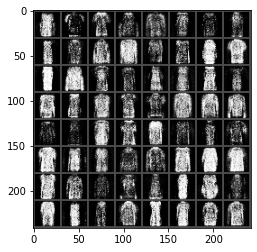

In [0]:
fig = plt.figure()
plt.ion()


generatedX = []

for epoch in range(5):
  for i, data in enumerate(dataLoader, 0):
    x, _ = iter(dataLoader).next()
    x = x.to(device)

    optimD.zero_grad()

    Dx = D(x)
    lossRealD = criterion(Dx, real)

    latent = torch.randn(batchSize, 100, device=device)
    Gx = G(latent).detach()
    Gx = D(Gx)
    lossFakeD = criterion(Gx, fake)
    
    lossD = lossRealD + lossFakeD

    lossD.backward()
    optimD.step()

    optimG.zero_grad()

    latent = torch.randn(batchSize, 100, device=device)
    Gx = G(latent)
    Gx = D(Gx)
    lossG = criterion(Gx, real)

    lossG.backward()
    optimG.step()


    if i % 100 == 0:
        x_gen = G(torch.randn(batchSize, 100, device=device))
        show_imgs(x_gen, isNewFig=False)
        fig.canvas.draw()
        print('e{}.i{}/{} last mb D(x)={:.4f} D(G(z))={:.4f}'.format(
                epoch, i, len(dataLoader), Dx.mean().item(), Gx.mean().item()))

  x_gen = G(torch.randn(batchSize, 100, device=device))
  generatedX.append(x_gen.detach().clone())

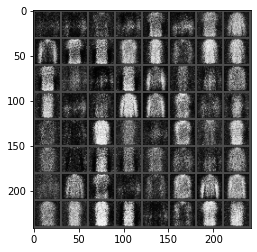

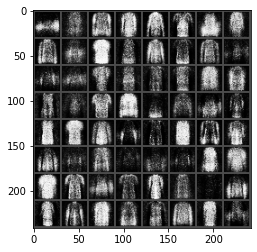

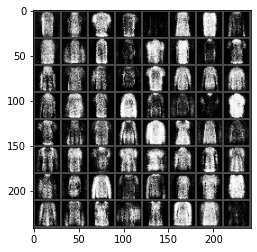

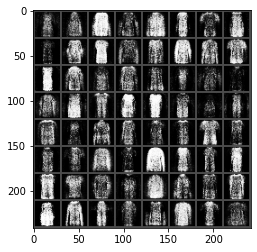

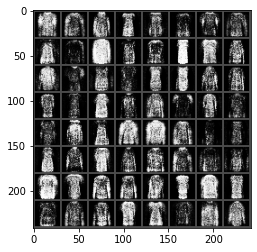

In [0]:
for x_gen in generatedX:
    show_imgs(x_gen)